<b>Loading the basic libraries</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')

<b>Loading the DataSet</b>

In [2]:
df = pd.read_csv('Phishing Data.csv')

<h2>EXPLORATORY DATA ANALYSIS</h2>

<b>Checking the head of the DataSet</b>

In [3]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,0,1,1,-1,1,-1,1,1,0,0,0,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,0,1,1,0,-1,-1,0,0,0,0,0,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,0,1,1,0,-1,-1,1,1,0,0,0,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,0,1,-1,0,0,-1,0,0,0,0,0,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,0,0,1,0,0,-1,0,0,0,1,0,1,0,-1,1,0,-1,0,1,0,0


<p> <i>On a first glance, the DataSet appears to be very clean, organized and pre-processed with feature engineering techniques, in order to obtain categorical atteributes</i></p>

<b>Overview of the DataSet</b>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            2456 non-null   int64
 1   URL_Length                   2456 non-null   int64
 2   Shortining_Service           2456 non-null   int64
 3   having_At_Symbol             2456 non-null   int64
 4   double_slash_redirecting     2456 non-null   int64
 5   Prefix_Suffix                2456 non-null   int64
 6   having_Sub_Domain            2456 non-null   int64
 7   SSLfinal_State               2456 non-null   int64
 8   Domain_registeration_length  2456 non-null   int64
 9   Favicon                      2456 non-null   int64
 10  port                         2456 non-null   int64
 11  HTTPS_token                  2456 non-null   int64
 12  Request_URL                  2456 non-null   int64
 13  URL_of_Anchor                2456 non-null   int

<p><i> All the attributes, including the output variable are of integer DataType. So, DataType conversions are not needed</i></p>

<b>Checking for Null values</b>

In [5]:
df.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

<p><i> No Null values are present. So, imputations are not required.</i></p>

<b>Visualizing the correlation-coefficient among all the attributes</b>

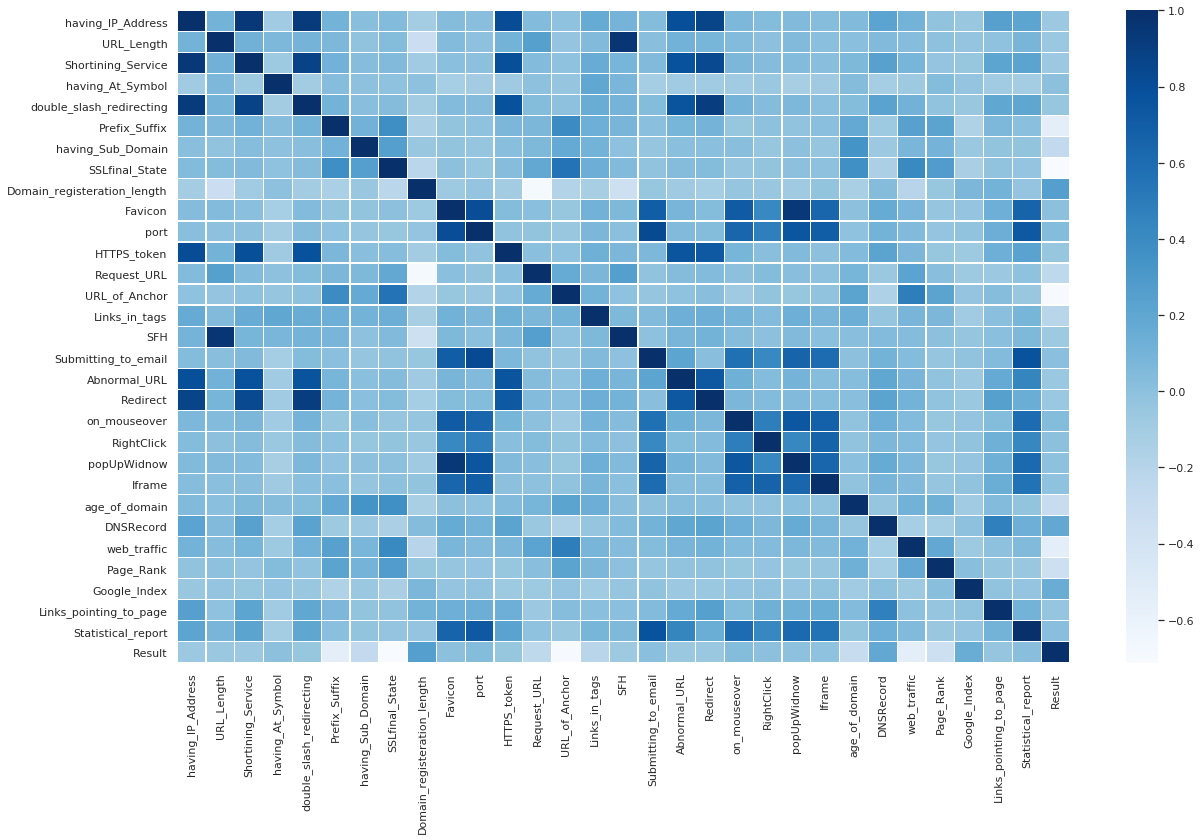

In [6]:
sns.set(rc={'figure.figsize':(20,12)})
ax = sns.heatmap(df.corr(), linewidths=0.2, cmap="Blues")

<p><i> Attributes like Prefix_Suffix, Domain_registeration_length, URL_of_Anchor, age_of_domain, DNSRecord, web_traffic and Google_Index show high levels of positive / negative correlation with the output variables. </i></p>

<b>Visualizing the output variable, Result</b>

0    1362
1    1094
Name: Result, dtype: int64


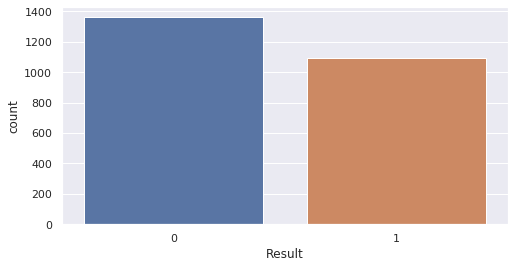

In [7]:
sns.set(rc={'figure.figsize':(8,4)})
ax = sns.countplot(df.Result)
print(df.Result.value_counts())

<p><i> Here, we can see that the samples of both the classes are present in similar proportion. So, we do not require to use any of the oversampling techniques.</i></p>
<li>There are a total of 2456 samples.
<li>1362 are non-phishing and 1094 are phishing websites.

<h3>Statistical Significance Analysis</h3>

<p><b>Here, we try to test the significance of each of the input variables with respect to the output variable using proportion testing techniques with a level of significance 0.05.</b></p>
Here, the null hypothesis is:
<li>$H_0:\beta_{i}=0$
i,e., Comparision are Not statistically significant.
<li>$H_A:\beta_{i}!=0$
i,e., Comparision are statistically significant.

In [8]:
import statsmodels.api as sm
X=df.drop(columns=['Result'])
Y=df.Result
XC=sm.add_constant(X)
result=sm.Logit(Y,XC).fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.132958
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                 2456
Model:                          Logit   Df Residuals:                     2425
Method:                           MLE   Df Model:                           30
Date:                Fri, 29 May 2020   Pseudo R-squ.:                  0.8065
Time:                        13:24:11   Log-Likelihood:                -326.54
converged:                       True   LL-Null:                       -1687.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.5301      0.277     -5.523      0.000  

<b>Filtering the attributes that have p-valie lower than 0.05 using Backward Elemination.</b>

In [9]:
cols=list(X.columns)
pmax=1
while(len(cols)>0):
    p=[]
    X=X[cols]
    XC=sm.add_constant(X)
    result=sm.Logit(Y,XC).fit()
    p=pd.Series(result.pvalues.values[1:],index=cols)
    pmax=max(p)
    feature_with_p_max=p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE=cols

Optimization terminated successfully.
         Current function value: 0.132958
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.132959
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.132962
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.132991
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.133024
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.133112
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.133212
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.133379
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.133533
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

<b>List of attributes that were tested to be significant</b>

In [10]:
for i in cols:
    print(i, end = '\n')

Prefix_Suffix
having_Sub_Domain
SSLfinal_State
port
Request_URL
URL_of_Anchor
Links_in_tags
Submitting_to_email
popUpWidnow
age_of_domain
DNSRecord
web_traffic
Page_Rank
Google_Index
Links_pointing_to_page


<b>Updating the list of the input variables</b>

In [11]:
X_final=X[selected_features_BE]

<b>Performing a 70:30 Train-Test Split</b>

In [12]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X_final,Y,test_size=0.3,random_state=0)
print(Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape)

(1719, 15) (737, 15) (1719,) (737,)


<h3>Fitting a base Logistic Regression model to the training data</h3>

In [13]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(Xtrain,Ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<b>Predicting the outputs on the input training data and calculating the training accuracy</b>

In [14]:
from sklearn import metrics
Y_train_pred=LR.predict(Xtrain)
print('The accuracy on the training data is ',np.round(metrics.accuracy_score(Ytrain,Y_train_pred)*100, decimals = 4), '%')

The accuracy on the training data is  95.2298 %


<b>Predicting the outputs on the input test data and calculating the test accuracy</b>

In [15]:
Y_test_pred=LR.predict(Xtest)
print('The accuracy on the test data is ',np.round(metrics.accuracy_score(Ytest,Y_test_pred)*100, decimals = 4), '%')

The accuracy on the test data is  93.4871 %


<p><i>Here, the training accuracy is slight higher than the test accuracy, which suggests a slight overfitting of the model to the training samples. Though, both the accuracies are high, which suggests a good fit.The overfitting can be fixed using Ridge(L2 norm).</i></p>

<b>Regularizing the Logistic Regression model using Ridge</b>
<p><i>Initially we fit the data the data to the Ridge classifier with random parameters, then we try to find the best value for the parameter followed by changing the original ridge model parameter.</i></p>

In [16]:
from sklearn.linear_model import RidgeClassifier
RD = RidgeClassifier(alpha=0.5550000000000004,normalize=True)

In [17]:
RD.fit(Xtrain,Ytrain)
RD_pred=RD.predict(Xtest)

<b>Comparing the bias and varience of base Logistic regression and tuned Ridge classifier to find optimum fit</b>

In [18]:
from sklearn.model_selection import KFold
from sklearn import metrics
kf=KFold(n_splits=5,shuffle=True,random_state=0)
for model,name in zip([LR,RD],["Logit",'Ridge']):
    accuracy=[]
    for train_idx,test_idx in kf.split(X_final,Y):
        Xtrain,Xtest=X_final.iloc[train_idx,:],X_final.iloc[test_idx,:]
        Ytrain,Ytest=Y.iloc[train_idx],Y.iloc[test_idx]
        model.fit(Xtrain,Ytrain)
        Y_predict=model.predict(Xtest)
        acc=metrics.accuracy_score(Ytest,Y_predict)
        accuracy.append(acc)
    print("Accuracy score: %0.03f (+/- %0.5f) [%s]" % (np.mean(accuracy), np.std(accuracy,ddof=1),name))  

Accuracy score: 0.940 (+/- 0.01194) [Logit]
Accuracy score: 0.940 (+/- 0.00767) [Ridge]


<b>Using GridSearchCV to tune Ridge model</b>

In [19]:
from sklearn.model_selection import GridSearchCV
params_RD={'alpha':np.arange(0.1,1,0.001)}
GS_RD=GridSearchCV(RD,params_RD,cv=5,scoring='r2')
GS_RD.fit(X_final,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RidgeClassifier(alpha=0.5550000000000004,
                                       class_weight=None, copy_X=True,
                                       fit_intercept=True, max_iter=None,
                                       normalize=True, random_state=None,
                                       solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107, 0.108,
       0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0...
       0.955, 0.956, 0.957, 0.958, 0.959, 0.96 , 0.961, 0.962, 0.963,
       0.964, 0.965, 0.966, 0.967, 0.968, 0.969, 0.97 , 0.971, 0.972,
       0.973, 0.974, 0.975, 0.976, 0.977, 0.978, 0.979, 0.98 , 0.981,
       0.982, 0.983, 0.984, 0.985, 0.986, 0.987, 0.988, 0.989, 0.99 ,
       0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999])},
             pre_dispatch='2*n_jobs', refit=True, return_tr

In [20]:
print('Best parameter for Ridge classifier: ', GS_RD.best_params_['alpha'])

Best parameter for Ridge classifier:  0.5550000000000004


<b>Checking train and test accuracy on the Ridge classifier</b>

In [21]:
Y_train_pred_RD=RD.predict(Xtrain)
print('The accuracy on the training data is ',np.round(metrics.accuracy_score(Ytrain,Y_train_pred_RD)*100, decimals = 4), '%')
Y_test_pred_RD=RD.predict(Xtest)
print('The accuracy on the test data is ',np.round(metrics.accuracy_score(Ytest,Y_test_pred_RD)*100, decimals = 4), '%')

The accuracy on the training data is  94.3511 %
The accuracy on the test data is  93.279 %


<i>The Ridge classifier is optimally fitted and the train and test accuracues are very close, compared to the base Logit model.</i>

<b>Visualising the confusing matrix of Ridge model on the test data</b>

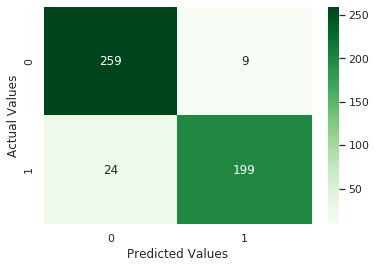

In [22]:
sns.set(rc = {'figure.figsize':(6,4)})
cm = metrics.confusion_matrix(Ytest,Y_test_pred_RD)
ax = sns.heatmap(cm,annot=True, cmap="Greens", fmt = '')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

<p>Here, the four values obtained for the metrix are:</p>


<b>True Positives:  </b>
Phishing websites classified as Phishing websites


<b>False Positives:  </b>
Non-Phishing websites classified as Phishing websites


<b>True Negatives:  </b>
Non-Phishing websites classified as Non-Phishing websites


<b>False Negatives:  </b>
Phishing websites classified as Non-Phishing websites

<i>To build a model that solves this particular business problem, our primary goal must be to reduce the number of False Negatives (Type 2 error) and then try to reduce False Positives (Type 1 error) if the former is achieved as if a small fraction genuine websites are classified as phishing websites, the damage done is less compared to classing Phishing websides as genuine websites</i>

<b>Calculating the Sensitivity of the model (proportion of total positives identified correctly)</b>

In [23]:
tpr=cm[1,1]/cm[1,:].sum()
print('The Sensitivity / Recall / TPR of the model is ',np.round(tpr*100, decimals = 4), '%')

The Sensitivity / Recall / TPR of the model is  89.2377 %


<b>Calculating the Specificity of the model (proportion of total negatives identified correctly)</b>

In [24]:
tnr=cm[0,0]/cm[0,:].sum()
print('The Specificity of the model is ',np.round(tnr*100, decimals = 4), '%')

The Specificity of the model is  96.6418 %


<b>Calculating the f1-score of the model (combination of Sensitivity and Specificity)</b>

In [25]:
print('The f1-score of the model is ',np.round(metrics.f1_score(Ytest,Y_test_pred_RD), decimals = 4))

The f1-score of the model is  0.9234


<i>One key point to note is that since Ridge Regression has low Recall, we might try to fix this using a different threshold using Logistic Regression</i>

<h3>Tuning the threshold in order to increase the recall (which is out prime objective)</h3>
<p><i>Here we try to find an optimum value of the threshold such that the Recall is maximized without sacrificing much on the accuracy or F1-score</i></p>

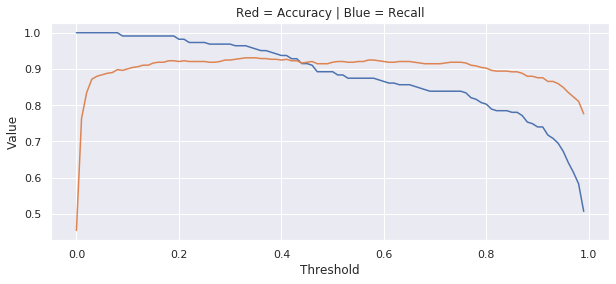

In [26]:
import decimal
def float_range(start, stop, step):
    while start < stop:
        yield float(start)
        start += decimal.Decimal(step)
thresholds = list(float_range(0, 1, '0.01'))
acc = []
rc = []
for i in thresholds:
    preds = np.where(LR.predict_proba(Xtest)[:,1] > i, 1, 0)
    acc.append(metrics.accuracy_score(Ytest, preds))
    rc.append(metrics.recall_score(Ytest, preds))
sns.set(rc = {'figure.figsize':(10,4)})
sns.lineplot(thresholds, rc)
sns.lineplot(thresholds, acc)
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Red = Accuracy | Blue = Recall')
plt.show()

<p><i> Here, for threshold = 0.35, the recall is optimally high</i></p>

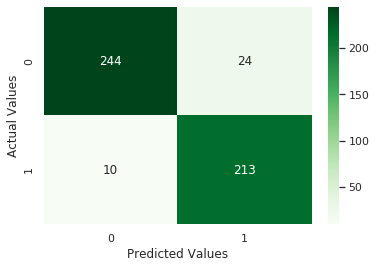

Accuracy:  93.0754 %
Recall:  95.5157 %
Precision:  89.8734 %
F1-score:  92.6087 %


In [27]:
def cm_for_thresh(thresh):    
    threshold = thresh
    preds = np.where(LR.predict_proba(Xtest)[:,1] > threshold, 1, 0)
    sns.set(rc = {'figure.figsize':(6,4)})
    cm = metrics.confusion_matrix(Ytest,preds)
    ax = sns.heatmap(cm,annot=True, cmap="Greens", fmt = '')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.show()
    print('Accuracy: ',np.round(metrics.accuracy_score(Ytest, preds)*100, decimals = 4), '%')
    print('Recall: ',np.round(metrics.recall_score(Ytest, preds)*100, decimals = 4), '%')
    print('Precision: ',np.round(metrics.precision_score(Ytest, preds)*100, decimals = 4), '%')
    print('F1-score: ',np.round(metrics.f1_score(Ytest, preds)*100, decimals = 4), '%')
cm_for_thresh(0.35)

<p><i> So we can conclude that, for threshold = 0.35, the recall is optimally high as well as the Accuracy and the F1-score is retained as well</i></p>

<h3>Fitting base advanced models</h3>

<b>Loading the Libraries</b>

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

<b>Creating Model objects</b>

In [29]:
DT = DecisionTreeClassifier()
NB = GaussianNB()
KNN = KNeighborsClassifier()
SVM = SVC()

<b>Cross-validating the models</b>

Logit: 0.987600 (0.000009)
Decisiion Tree: 0.973327 (0.000128)
Naive Bayes: 0.979830 (0.000026)
KNN: 0.989014 (0.000038)
SVM: 0.990546 (0.000018)


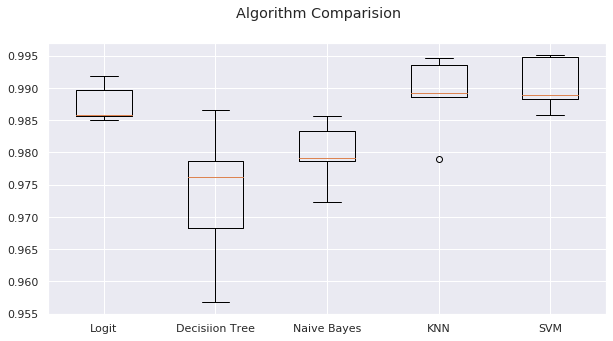

In [30]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#evaluate each model in turn
results=[]
names=[]
for model,name in zip([LR, DT, NB, KNN, SVM],['Logit','Decisiion Tree','Naive Bayes','KNN', 'SVM']):    
    kfold=KFold(shuffle=True,n_splits=5,random_state=0)
    cv_results=cross_val_score(model,X,Y,cv=kfold,scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))
    #boxplot algorithm comparision
sns.set(rc={'figure.figsize':(10,5)})
fig=plt.figure()
fig.suptitle('Algorithm Comparision')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<h3>Fitting tuned DT and KNN models for better performance </h3>

<b>Defining the parameters to be tuned</b>

In [31]:
params_knn={'n_neighbors':np.arange(1,50),'weights':['uniform','distance']}
params_dt={'criterion':['entropy','gini'],'max_depth':np.arange(1,10)}
GS_knn=GridSearchCV(KNN,params_knn,cv=5,scoring='recall')
GS_dt=GridSearchCV(DT,params_dt,cv=5,scoring='recall')

<b>Fitting the parameters</b>`

In [32]:
GS_dt.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                   

In [33]:
GS_knn.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

<b>Finding the best-params</b>

In [34]:
print('Best parameter for DT classifier: ', GS_dt.best_params_)

Best parameter for DT classifier:  {'criterion': 'gini', 'max_depth': 9}


In [35]:
print('Best parameter for KNN classifier: ', GS_knn.best_params_)

Best parameter for KNN classifier:  {'n_neighbors': 1, 'weights': 'uniform'}


<b>Defining the tuned models with best params</b>

In [36]:
DT_tuned=DecisionTreeClassifier(criterion='gini',max_depth=9)
KNN_tuned=KNeighborsClassifier(n_neighbors=1,weights='uniform')

<b>Cross-validating all the models so far</b>

Logit: 0.941352 (0.000276)
Ridge: 0.940959 (0.000229)
Decisiion Tree: 0.964170 (0.000165)
Naive Bayes: 0.923858 (0.000096)
KNN: 0.945445 (0.000353)
SVM: 0.958065 (0.000239)
Tuned Decision Tree: 0.959280 (0.000181)
Tuned KNN: 0.968651 (0.000191)


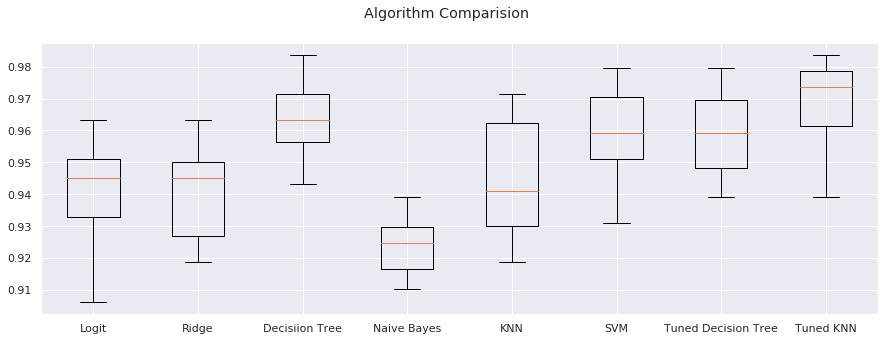

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#evaluate each model in turn
results=[]
names=[]
for model,name in zip([LR, RD, DT, NB, KNN, SVM, DT_tuned,KNN_tuned ],['Logit','Ridge', 'Decisiion Tree','Naive Bayes','KNN', 
                                                                   'SVM', 'Tuned Decision Tree', 'Tuned KNN']):    
    kfold=KFold(shuffle=True,n_splits=10,random_state=0)
    cv_results=cross_val_score(model,X,Y,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))
    #boxplot algorithm comparision
sns.set(rc={'figure.figsize':(15,5)})
fig=plt.figure()
fig.suptitle('Algorithm Comparision')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<i>Here, we find the tuned KNN and the base SVM to be the top two best models in terms of accuracy and consistency</i>

<h3>Checking performance of the tuned KNN model</h3>

<b>Train and test accuracy</b>

In [38]:
KNN_tuned.fit(Xtrain, Ytrain)
Y_train_pred_KNN_tuned=KNN_tuned.predict(Xtrain)
print('The accuracy on the training data is ',np.round(metrics.accuracy_score(Ytrain,Y_train_pred_KNN_tuned)*100, decimals = 4), '%')
Y_test_pred_KNN_tuned=KNN_tuned.predict(Xtest)
print('The accuracy on the test data is ',np.round(metrics.accuracy_score(Ytest,Y_test_pred_KNN_tuned)*100, decimals = 4), '%')

The accuracy on the training data is  98.8804 %
The accuracy on the test data is  95.5193 %


<i>Here both train and test accuracy are very close and high at the same time but overfitting is clearly apearent</i>

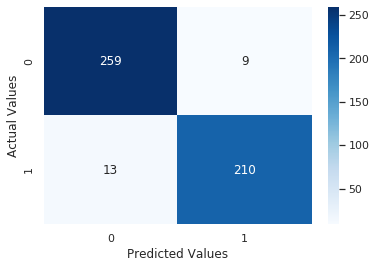

In [39]:
sns.set(rc = {'figure.figsize':(6,4)})
cm = metrics.confusion_matrix(Ytest,Y_test_pred_KNN_tuned)
ax = sns.heatmap(cm,annot=True, cmap="Blues", fmt = '')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

<h3>Checking performance of the base SVM model</h3>

<b>Train and test accuracy</b>

In [40]:
SVM.fit(Xtrain, Ytrain)
Y_train_pred_SVM=SVM.predict(Xtrain)
print('The accuracy on the training data is ',np.round(metrics.accuracy_score(Ytrain,Y_train_pred_SVM)*100, decimals = 4), '%')
Y_test_pred_SVM=SVM.predict(Xtest)
print('The accuracy on the test data is ',np.round(metrics.accuracy_score(Ytest,Y_test_pred_SVM)*100, decimals = 4), '%')

The accuracy on the training data is  96.6921 %
The accuracy on the test data is  95.112 %


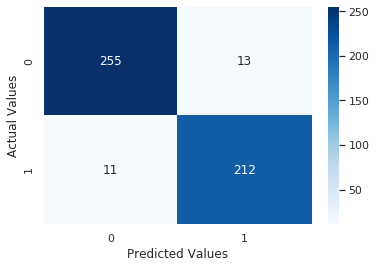

In [41]:
sns.set(rc = {'figure.figsize':(6,4)})
cm = metrics.confusion_matrix(Ytest,Y_test_pred_SVM)
ax = sns.heatmap(cm,annot=True, cmap="Blues", fmt = '')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

<i>Here both train and test accuracy are very close and high at the same time but no major overfitting is apearent. We shall consider the best model so far.</i>

<h3>Fitting tuned ensemble models for enhanced prediction </h3>

<b>Defining the parameters to be tuned</b>

In [42]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
RF=RandomForestClassifier()
AB=AdaBoostClassifier()
params_rf={'criterion':['entropy','gini'], 'max_features':['auto', 'sqrt', 'log2']}
params_ab={'algorithm':['SAMME.R', 'SAMME'], 'n_estimators':np.arange(40,60) }
GS_rf=GridSearchCV(RF,params_rf,cv=5,scoring='recall')
GS_ab=GridSearchCV(AB,params_ab,cv=5,scoring='recall')

<b>Fitting the parameters</b>`

In [43]:
GS_rf.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [44]:
GS_ab.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['SAMME.R', 'SAMME'],
                         'n_estimators': array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

<b>Finding the best-params</b>

In [45]:
print('Best parameter for RF classifier: ', GS_rf.best_params_)

Best parameter for RF classifier:  {'criterion': 'gini', 'max_features': 'log2'}


In [46]:
print('Best parameter for AB classifier: ', GS_dt.best_params_)

Best parameter for AB classifier:  {'criterion': 'gini', 'max_depth': 9}


<b>Defining the tuned models with best params</b>

In [47]:
RF_tuned=RandomForestClassifier(criterion='entropy', max_features='sqrt', max_leaf_nodes=99999)
AB_tuned=AdaBoostClassifier(algorithm='SAMME')

<b>Cross-validating all the models so far</b>

Logit: 0.941352 (0.000276)
Ridge: 0.940959 (0.000229)
Decisiion Tree: 0.962945 (0.000171)
Naive Bayes: 0.923858 (0.000096)
KNN: 0.945445 (0.000353)
SVM: 0.958065 (0.000239)
Tuned Decision Tree: 0.958465 (0.000191)
Tuned KNN: 0.968651 (0.000191)
Tuned RF: 0.964176 (0.000234)
Tuned AB: 0.944621 (0.000237)


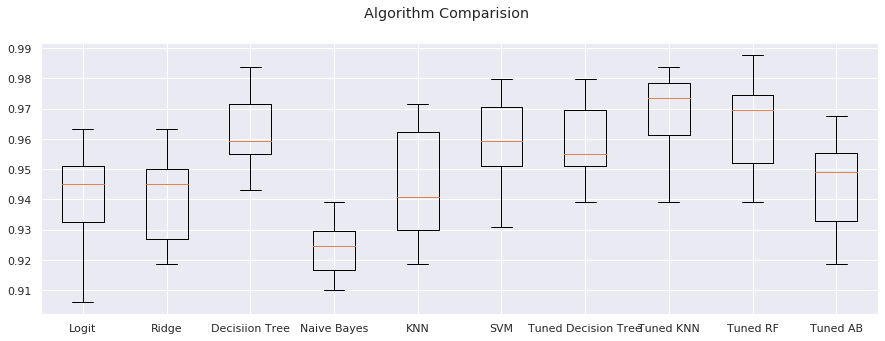

In [48]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#evaluate each model in turn
results=[]
names=[]
for model,name in zip([LR, RD, DT, NB, KNN, SVM, DT_tuned,KNN_tuned, RF_tuned, AB_tuned ],['Logit','Ridge', 'Decisiion Tree','Naive Bayes','KNN', 
                                                                   'SVM', 'Tuned Decision Tree', 'Tuned KNN', 'Tuned RF', 'Tuned AB']):    
    kfold=KFold(shuffle=True,n_splits=10,random_state=0)
    cv_results=cross_val_score(model,X,Y,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))
    #boxplot algorithm comparision
sns.set(rc={'figure.figsize':(15,5)})
fig=plt.figure()
fig.suptitle('Algorithm Comparision')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<h3>Checking performance of the tuned RF model</h3>

<b>Train and test accuracy</b>

In [49]:
RF_tuned.fit(Xtrain, Ytrain)
Y_train_pred_RF_tuned=RF_tuned.predict(Xtrain)
print('The accuracy on the training data is ',np.round(metrics.accuracy_score(Ytrain,Y_train_pred_RF_tuned)*100, decimals = 4), '%')
Y_test_pred_RF_tuned=RF_tuned.predict(Xtest)
print('The accuracy on the test data is ',np.round(metrics.accuracy_score(Ytest,Y_test_pred_RF_tuned)*100, decimals = 4), '%')

The accuracy on the training data is  98.9822 %
The accuracy on the test data is  96.334 %


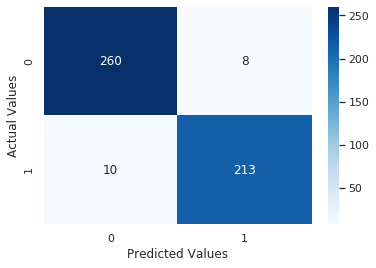

In [50]:
sns.set(rc = {'figure.figsize':(6,4)})
cm = metrics.confusion_matrix(Ytest,Y_test_pred_RF_tuned)
ax = sns.heatmap(cm,annot=True, cmap="Blues", fmt = '')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [51]:
tpr=cm[1,1]/cm[1,:].sum()
print('The Sensitivity / Recall / TPR of the model is ',np.round(tpr*100, decimals = 4), '%')
tnr=cm[0,0]/cm[0,:].sum()
print('The Specificity of the model is ',np.round(tnr*100, decimals = 4), '%')
print('The f1-score of the model is ',np.round(metrics.f1_score(Ytest,Y_test_pred_RF_tuned), decimals = 4))

The Sensitivity / Recall / TPR of the model is  95.5157 %
The Specificity of the model is  97.0149 %
The f1-score of the model is  0.9595


<i>So, a tuned RF with the parameters {'criterion': 'entropy', 'max_features': 'sqrt'} remains to be our final model returning a 10-fold cross-validation accuracy of about 96.67 % on the train set. Also, the recall of the model is about 96 % while the sensitivity is about 97 %. </i>